Welcome to Homework 1! Your task for this homework is to implement logistic regression from scratch. You are welcome to use existing software packages to check your work. However, implementing it once in your life will help you better understand how this algorithm works.

Recall: Logistic regression is a classification model that estimates the probability of a binary outcome $Y$ being equal to 1, given variables/features $X$. It assumes that the log odds is linear with respect to $X$. Because it can be viewed as a generalization of linear regression, it falls under the general umbrella of methods called "generalizaed linear models."

Helpful resources:
* https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Concepts you'll need from lectures:
* Maximum likelihood estimation
* Gradient descent


### Part 1

**How does Logistic Regression work?**

Q1: What is the mathematical equation that describes the probability distribution of a binary random variable? (4 points)

$p(x; q) = q^x(1-q)^{1-x}$



Q2: What probability distribution does logistic regression assume $Y|X$ follows? (5 points)

Bernoulli  



Q3: What are the parameters of a logistic regression model? (5 points)

The parameters of a logistic regression model are the regression coefficients $\beta = (\beta_0, \beta_1, \ldots, \beta_p)$, where:

- $\beta_0$ is the intercept term (also called the bias)
- $\beta_1, \beta_2, \ldots, \beta_p$ are the coefficients for each of the $p$ features/predictors

These parameters define the relationship between the input features $X = (X_1, X_2, \ldots, X_p)$ and the log-odds of the positive class:

$\log\left(\frac{P(Y=1|X)}{P(Y=0|X)}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p = \beta^T X$

The coefficients have the following interpretation:
- $\beta_0$ represents the log-odds of the positive class when all features are zero
- Each $\beta_j$ for $j \geq 1$ represents the change in log-odds when the corresponding feature $X_j$ increases by one unit, holding all other features constant

Q4: What is the log likelihood of the parameters given observations $(X_i, Y_i)$ for $i=1,\cdots, n$? (8 points)

The log likelihood of the parameters $\beta$ given observations $(X_i, Y_i)$ for $i=1,\cdots, n$ is:

$\ell(\beta) = \log L(\beta) = \log \prod_{i=1}^{n} P(Y_i|X_i; \beta)$

Since logistic regression assumes $Y_i|X_i$ follows a Bernoulli distribution with parameter $p(X_i)$, we have:

$P(Y_i|X_i; \beta) = p(X_i)^{Y_i} \cdot (1-p(X_i))^{1-Y_i}$

Where $p(X_i) = \frac{1}{1 + e^{-\beta^T X_i}}$ is the probability that $Y_i = 1$ given $X_i$.

Taking the logarithm of the likelihood and using the properties of logarithms:

$\ell(\beta) = \log \prod_{i=1}^{n} p(X_i)^{Y_i} \cdot (1-p(X_i))^{1-Y_i}$

$\ell(\beta) = \sum_{i=1}^{n} \log [p(X_i)^{Y_i} \cdot (1-p(X_i))^{1-Y_i}]$

$\ell(\beta) = \sum_{i=1}^{n} [Y_i \log p(X_i) + (1-Y_i) \log (1-p(X_i))]$

Substituting $p(X_i) = \frac{1}{1 + e^{-\beta^T X_i}}$, we get:

$\ell(\beta) = \sum_{i=1}^{n} \left[Y_i \log \left(\frac{1}{1 + e^{-\beta^T X_i}}\right) + (1-Y_i) \log \left(1 - \frac{1}{1 + e^{-\beta^T X_i}}\right)\right]$

$\ell(\beta) = \sum_{i=1}^{n} \left[Y_i \log \left(\frac{1}{1 + e^{-\beta^T X_i}}\right) + (1-Y_i) \log \left(\frac{e^{-\beta^T X_i}}{1 + e^{-\beta^T X_i}}\right)\right]$

$\ell(\beta) = \sum_{i=1}^{n} \left[Y_i (-\log(1 + e^{-\beta^T X_i})) + (1-Y_i) (-\beta^T X_i - \log(1 + e^{-\beta^T X_i}))\right]$

$\ell(\beta) = \sum_{i=1}^{n} \left[Y_i \beta^T X_i - \log(1 + e^{\beta^T X_i})\right]$

This is the log likelihood function for logistic regression.

Q5: What is the optimization problem that we try to solve when fitting logistic regression?  (8 points)

The log-likelihood function for logistic regression with N observations is:

$$\ell(\beta) = \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right]$$

Where:
- $y_i$ is the observed class (0 or 1) for observation $i$
- $p_i = P(G=1|X=x_i) = \frac{1}{1 + e^{-\beta^T x_i}}$ is the predicted probability that $G=1$ for observation $i$
- $\beta$ represents the model parameters (coefficients)

This is the function we aim to maximize when fitting a logistic regression model.

The negative of this log-likelihood is the loss function I provided earlier:

$$\mathcal{L} = -\ell(\beta) = -\sum_{i=1}^{N} \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right]$$

Which we aim to minimize during optimization.

Q6: What procedures can be used to solve the optimization problem underlying logistic regression? (5 points)

Several optimization procedures can be used to solve the logistic regression optimization problem:

1. **Gradient Descent**: An iterative algorithm that updates parameters in the direction of the negative gradient of the cost function.
   
   $\beta^{(t+1)} = \beta^{(t)} - \alpha \nabla_\beta J(\beta^{(t)})$
   
   where $\alpha$ is the learning rate and $\nabla_\beta J(\beta)$ is the gradient of the cost function with respect to $\beta$.

2. **Stochastic Gradient Descent (SGD)**: A variant of gradient descent that uses a single randomly selected training example to compute the gradient at each iteration, making it more computationally efficient for large datasets.

3. **Mini-batch Gradient Descent**: A compromise between batch gradient descent and SGD that uses a small random subset of training examples to compute the gradient at each iteration.

4. **Newton's Method**: A second-order optimization method that uses both the gradient and the Hessian matrix of the cost function.
   
   $\beta^{(t+1)} = \beta^{(t)} - [H_\beta J(\beta^{(t)})]^{-1} \nabla_\beta J(\beta^{(t)})$
   
   where $H_\beta J(\beta)$ is the Hessian matrix of the cost function.

5. **Quasi-Newton Methods**: Methods like BFGS and L-BFGS that approximate the Hessian matrix to avoid the computational cost of calculating and inverting it directly.

6. **Coordinate Descent**: Optimizes one parameter at a time while holding others constant, cycling through all parameters until convergence.

7. **Conjugate Gradient**: An algorithm that generates a sequence of search directions that are conjugate with respect to the Hessian matrix.

Each method has its trade-offs in terms of computational efficiency, memory requirements, and convergence properties. The choice depends on factors such as dataset size, feature dimensionality, and available computational resources.

Q7: Derive the gradient of the log likelihood with respect to the parameters of the logistic regression model step by step. (5 points)


Let's start with the log likelihood function for logistic regression:

$\ell(\beta) = \sum_{i=1}^{n} \left[Y_i \beta^T X_i - \log(1 + e^{\beta^T X_i})\right]$

To find the gradient, we need to compute the partial derivatives with respect to each parameter $\beta_j$:

$\frac{\partial \ell(\beta)}{\partial \beta_j} = \frac{\partial}{\partial \beta_j} \sum_{i=1}^{n} \left[Y_i \beta^T X_i - \log(1 + e^{\beta^T X_i})\right]$

$= \sum_{i=1}^{n} \frac{\partial}{\partial \beta_j} \left[Y_i \beta^T X_i - \log(1 + e^{\beta^T X_i})\right]$

Let's compute each term separately:

1. First term: $\frac{\partial}{\partial \beta_j} (Y_i \beta^T X_i) = \frac{\partial}{\partial \beta_j} (Y_i \sum_{k=0}^{p} \beta_k X_{ik}) = Y_i X_{ij}$

2. Second term: $\frac{\partial}{\partial \beta_j} \log(1 + e^{\beta^T X_i})$

Using the chain rule:
$\frac{\partial}{\partial \beta_j} \log(1 + e^{\beta^T X_i}) = \frac{1}{1 + e^{\beta^T X_i}} \cdot \frac{\partial}{\partial \beta_j}(1 + e^{\beta^T X_i}) = \frac{1}{1 + e^{\beta^T X_i}} \cdot e^{\beta^T X_i} \cdot X_{ij}$

$= \frac{e^{\beta^T X_i}}{1 + e^{\beta^T X_i}} \cdot X_{ij}$

Note that $\frac{e^{\beta^T X_i}}{1 + e^{\beta^T X_i}} = \frac{1}{1 + e^{-\beta^T X_i}} = p(X_i)$, which is the predicted probability that $Y_i = 1$.

Combining the terms:

$\frac{\partial \ell(\beta)}{\partial \beta_j} = \sum_{i=1}^{n} \left[Y_i X_{ij} - \frac{e^{\beta^T X_i}}{1 + e^{\beta^T X_i}} X_{ij}\right]$

$= \sum_{i=1}^{n} \left[Y_i X_{ij} - p(X_i) X_{ij}\right]$

$= \sum_{i=1}^{n} \left[Y_i - p(X_i)\right] X_{ij}$

Therefore, the gradient of the log likelihood with respect to the parameter vector $\beta$ is:

$\nabla_\beta \ell(\beta) = \sum_{i=1}^{n} \left[Y_i - p(X_i)\right] X_i$

In vector form, this can be written as:

$\nabla_\beta \ell(\beta) = X^T (Y - p)$

where:
- $X$ is the $n \times (p+1)$ design matrix with rows $X_i^T$
- $Y$ is the $n \times 1$ vector of observed outcomes
- $p$ is the $n \times 1$ vector of predicted probabilities $p(X_i)$

This gradient is used in gradient-based optimization methods to find the parameters that maximize the log likelihood.

### Part 2

**Implement Logistic Regression**

Q1: Write the function `generate_X(n,p)`, which returns randomly generated $X_1,\cdots, X_n$, where $X_i \in \mathbb{R}^p$. You can sample the variables using a uniform distribution or a standard normal distribution. (8 points)

In [5]:
import numpy as np

def generate_X(n, p):
    """
    Generate a random feature matrix X with n samples and p features.
    
    Parameters:
    -----------
    n : int
        Number of samples to generate
    p : int
        Number of features for each sample
    
    Returns:
    --------
    X : numpy.ndarray
        Matrix of shape (n, p) containing the generated features
    """
    # Using standard normal distribution (mean=0, std=1)
    X = np.random.normal(size=(n, p))
    
    # Alternative approach using uniform distribution
    # X = np.random.uniform(low=-1, high=1, size=(n, p))
    
    return X

# Example usage:
# n_samples = 100
# n_features = 5
# X = generate_X(n_samples, n_features)
# print(f"Generated matrix shape: {X.shape}")
# print(X[:5])  # Print first 5 samples

Q2: Write the function `generate_Y(X, beta, intercept)`, which generates outcomes for observations $X_1,\cdots, X_p$ per a logistic regression model with coefficients $\beta \in \mathbb{R}^{p}$ and intercept $\beta_0$. (10 points)

In [12]:
import numpy as np

def generate_Y(X, beta, intercept):
    """
    Generate binary outcomes Y based on a logistic regression model.
    
    Parameters:
    -----------
    X : numpy.ndarray
        Feature matrix of shape (n, p) where n is the number of samples
        and p is the number of features
    beta : numpy.ndarray
        Coefficient vector of shape (p,) for the features
    intercept : float
        Intercept term (β₀) in the logistic regression model
    
    Returns:
    --------
    Y : numpy.ndarray
        Binary outcome vector of shape (n,) containing 0s and 1s
    """
    # Number of samples
    n = X.shape[0]
    
    # Calculate the linear predictor: β₀ + X·β
    z = intercept + np.dot(X, beta)
    
    # Apply the logistic function to get probabilities
    # p(x) = 1 / (1 + exp(-z))
    probabilities = 1 / (1 + np.exp(-z))
    
    # Generate binary outcomes by comparing probabilities to random uniform values
    # This simulates Bernoulli trials with the calculated probabilities
    random_values = np.random.uniform(0, 1, n)
    Y = (probabilities > random_values).astype(int)
    
    return Y

# Example usage:
# n_samples = 100
# n_features = 5
# X = generate_X(n_samples, n_features)
# true_beta = np.random.normal(size=n_features)  # Random coefficients
# true_intercept = 0.5  # Intercept term
# Y = generate_Y(X, true_beta, true_intercept)
# print(f"Generated Y shape: {Y.shape}")
# print(f"Class distribution: {np.bincount(Y)}")

Q3: Generate some data using your functions above with $p=2$, $n=1000$, coefficients $\beta=(0.5,2)$, and intercept $\beta_0 = 1$. (7 points)

Generated dataset with 1000 samples and 2 features
Coefficients (beta): [0.5 2. ]
Intercept (beta_0): 1
Class distribution: [345 655]


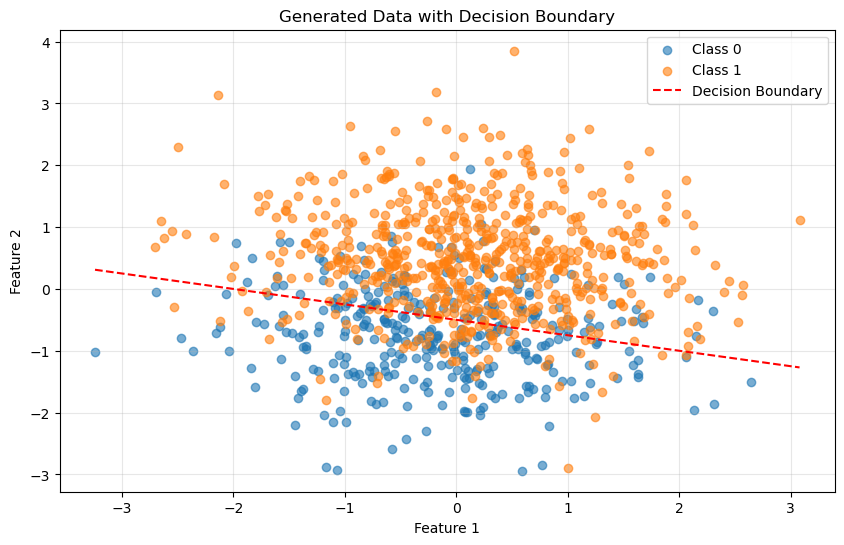

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n = 1000  # number of samples
p = 2     # number of features
beta = np.array([0.5, 2])  # coefficients
intercept = 1  # intercept term

# Generate features X
X = generate_X(n, p)

# Generate binary outcomes Y
Y = generate_Y(X, beta, intercept)

# Display information about the generated data
print(f"Generated dataset with {n} samples and {p} features")
print(f"Coefficients (beta): {beta}")
print(f"Intercept (beta_0): {intercept}")
print(f"Class distribution: {np.bincount(Y)}")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0', alpha=0.6)
plt.scatter(X[Y==1, 0], X[Y==1, 1], label='Class 1', alpha=0.6)

# Plot the decision boundary
# The decision boundary is where β₀ + β₁x₁ + β₂x₂ = 0
# Rearranging for x₂: x₂ = -(β₀ + β₁x₁)/β₂
x1_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
x2_boundary = -(intercept + beta[0] * x1_range) / beta[1]
plt.plot(x1_range, x2_boundary, 'r--', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data with Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Q4: Implement a function that runs gradient descent `run_gradient_descent(X, Y, alpha, num_iterations, initial_betas)`. Make sure to vectorize your code. (Otherwise it will run really slowly.) (15 points)

In [23]:
import numpy as np

def run_gradient_descent(X, Y, alpha, num_iterations, initial_betas):
    """
    Run gradient descent to find optimal parameters for logistic regression.
    
    Parameters:
    -----------
    X : numpy.ndarray
        Feature matrix of shape (n, p) where n is the number of samples
        and p is the number of features (without intercept)
    Y : numpy.ndarray
        Binary outcome vector of shape (n,) containing 0s and 1s
    alpha : float
        Learning rate for gradient descent
    num_iterations : int
        Number of iterations to run gradient descent
    initial_betas : numpy.ndarray
        Initial values for all parameters (including intercept) of shape (p+1,)
        where initial_betas[0] is the intercept
    
    Returns:
    --------
    betas : numpy.ndarray
        Optimized parameters after gradient descent
    cost_history : list
        List of cost values at each iteration
    """
    # Number of samples
    n = X.shape[0]
    
    # Add a column of 1s to X for the intercept term
    X_with_intercept = np.column_stack((np.ones(n), X))
    
    # Initialize parameters and cost history
    betas = initial_betas.copy()
    cost_history = []
    
    # Run gradient descent for specified number of iterations
    for i in range(num_iterations):
        # Calculate the linear predictor z = X·β
        z = np.dot(X_with_intercept, betas)
        
        # Calculate predicted probabilities using the logistic function
        predictions = 1 / (1 + np.exp(-z))
        
        # Calculate the cost (negative log likelihood)
        # Using a numerically stable version to avoid log(0) issues
        epsilon = 1e-15  # Small value to avoid log(0)
        predictions_safe = np.clip(predictions, epsilon, 1 - epsilon)
        cost = -np.mean(Y * np.log(predictions_safe) + (1 - Y) * np.log(1 - predictions_safe))
        cost_history.append(cost)
        
        # Calculate the gradient (vectorized)
        errors = predictions - Y
        gradient = np.dot(X_with_intercept.T, errors) / n
        
        # Update parameters using gradient descent
        betas = betas - alpha * gradient
        
    return betas, cost_history

# Example usage:
# n_samples = 1000
# n_features = 2
# X = generate_X(n_samples, n_features)
# true_beta = np.array([0.5, 2])
# true_intercept = 1
# Y = generate_Y(X, true_beta, true_intercept)
# 
# # Initialize parameters
# initial_betas = np.zeros(n_features + 1)  # +1 for intercept
# 
# # Run gradient descent

Q5: Apply your implementation of gradient descent to the generated data to estimate the parameters. How close are they to the true parameters? (5 points)

Parameter Comparison:
True intercept (β₀): 1.0000, Estimated: 0.9562, Difference: 0.0438
True β₁: 0.5000, Estimated: 0.5368, Difference: 0.0368
True β₂: 2.0000, Estimated: 1.9948, Difference: 0.0052


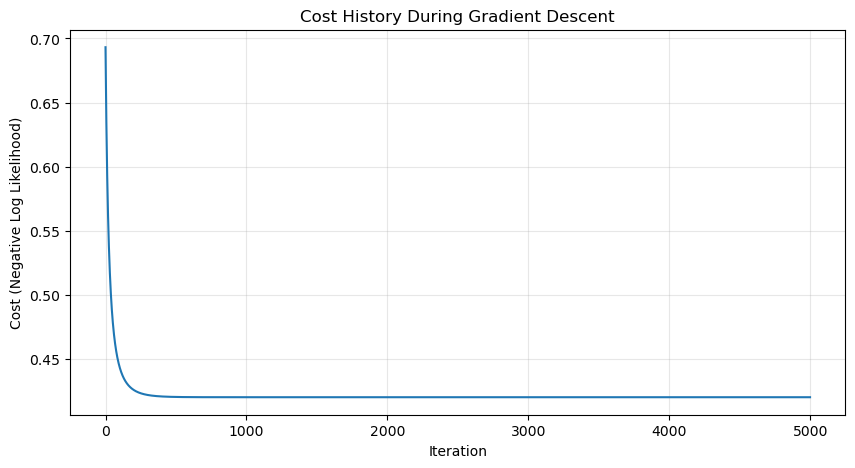

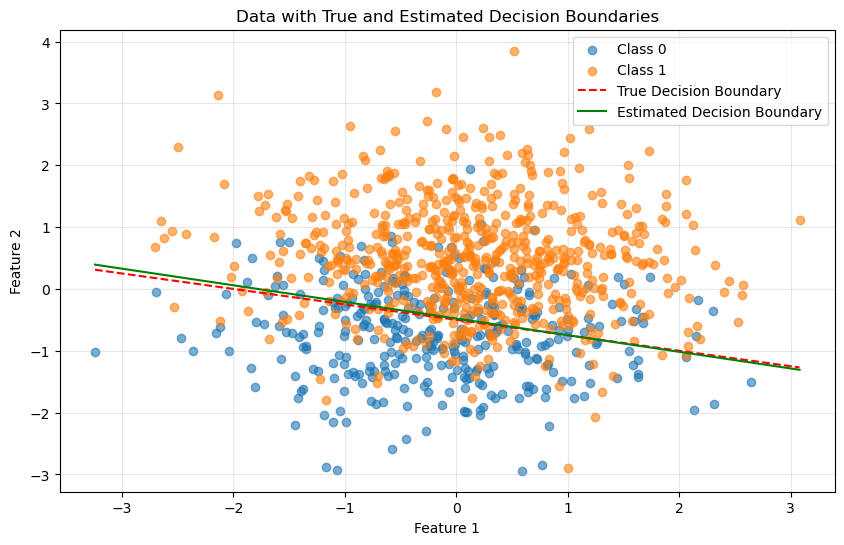

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Use the same random seed as before for consistency
np.random.seed(42)

# Generate data with the specified parameters
n = 1000
p = 2
true_beta = np.array([0.5, 2])
true_intercept = 1

# Generate features and outcomes
X = generate_X(n, p)
Y = generate_Y(X, true_beta, true_intercept)

# Initialize parameters for gradient descent
initial_betas = np.zeros(p + 1)  # +1 for intercept
learning_rate = 0.1
iterations = 5000

# Run gradient descent
estimated_betas, cost_history = run_gradient_descent(X, Y, learning_rate, iterations, initial_betas)

# Extract the estimated intercept and coefficients
estimated_intercept = estimated_betas[0]
estimated_coefficients = estimated_betas[1:]

# Compare true and estimated parameters
print("Parameter Comparison:")
print(f"True intercept (β₀): {true_intercept:.4f}, Estimated: {estimated_intercept:.4f}, Difference: {abs(true_intercept - estimated_intercept):.4f}")
print(f"True β₁: {true_beta[0]:.4f}, Estimated: {estimated_coefficients[0]:.4f}, Difference: {abs(true_beta[0] - estimated_coefficients[0]):.4f}")
print(f"True β₂: {true_beta[1]:.4f}, Estimated: {estimated_coefficients[1]:.4f}, Difference: {abs(true_beta[1] - estimated_coefficients[1]):.4f}")

# Plot the cost history to check convergence
plt.figure(figsize=(10, 5))
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost (Negative Log Likelihood)')
plt.title('Cost History During Gradient Descent')
plt.grid(True, alpha=0.3)
plt.show()

# Visualize the data with both true and estimated decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0', alpha=0.6)
plt.scatter(X[Y==1, 0], X[Y==1, 1], label='Class 1', alpha=0.6)

# Plot the true decision boundary
x1_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
x2_true_boundary = -(true_intercept + true_beta[0] * x1_range) / true_beta[1]
plt.plot(x1_range, x2_true_boundary, 'r--', label='True Decision Boundary')

# Plot the estimated decision boundary
x2_estimated_boundary = -(estimated_intercept + estimated_coefficients[0] * x1_range) / estimated_coefficients[1]
plt.plot(x1_range, x2_estimated_boundary, 'g-', label='Estimated Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data with True and Estimated Decision Boundaries')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Q6: Rerun your implementation of gradient descent but with a different initialization. Are the estimated parameters the same as that in Q5? (8 points)

New random initialization: [-1.0856306   0.99734545  0.2829785 ]

Parameter Comparison between Different Initializations:
True parameters: Intercept=1.0000, β₁=0.5000, β₂=2.0000
Q5 (Zero init): Intercept=0.9562, β₁=0.5368, β₂=1.9948
Q6 (Random init): Intercept=0.9562, β₁=0.5368, β₂=1.9948

Differences between Q5 and Q6 estimates:
Intercept difference: 0.000000
β₁ difference: 0.000000
β₂ difference: 0.000000


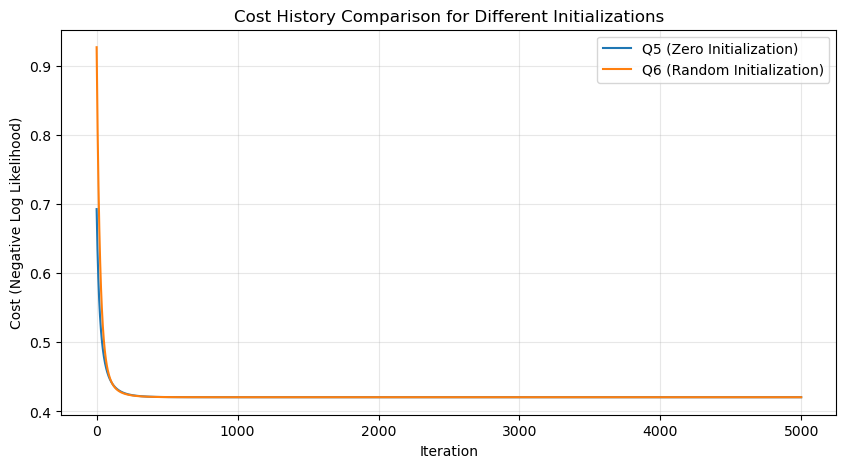

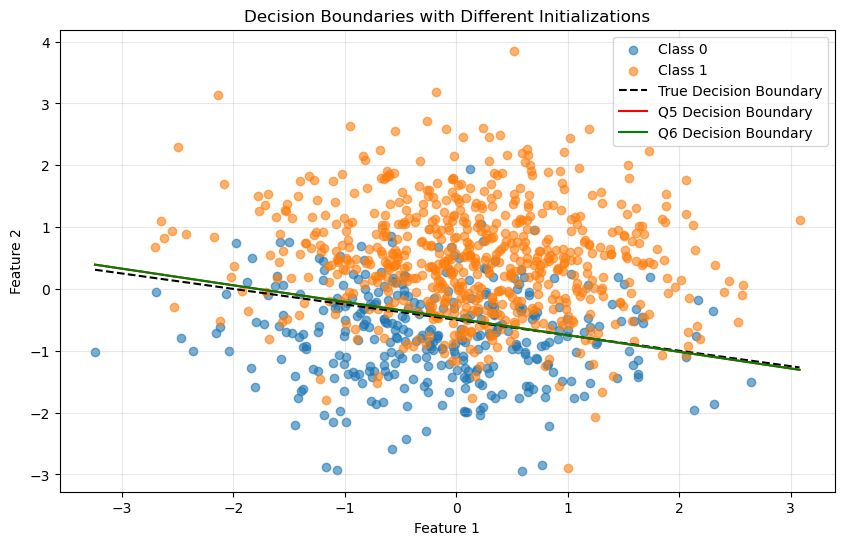

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Use the same random seed as before for consistency
np.random.seed(42)

# Generate data with the specified parameters (same as before)
n = 1000
p = 2
true_beta = np.array([0.5, 2])
true_intercept = 1

# Generate features and outcomes (same as before)
X = generate_X(n, p)
Y = generate_Y(X, true_beta, true_intercept)

# Store the previous results from Q5 for comparison
# Assuming we have the estimated_betas from Q5
estimated_betas_q5 = estimated_betas.copy()

# New initialization: random values instead of zeros
np.random.seed(123)  # Different seed for initialization
initial_betas_random = np.random.normal(0, 1, p + 1)  # Random initialization
print(f"New random initialization: {initial_betas_random}")

# Run gradient descent with the new initialization
learning_rate = 0.1
iterations = 5000
estimated_betas_new, cost_history_new = run_gradient_descent(X, Y, learning_rate, iterations, initial_betas_random)

# Compare results from both initializations
print("\nParameter Comparison between Different Initializations:")
print(f"True parameters: Intercept={true_intercept:.4f}, β₁={true_beta[0]:.4f}, β₂={true_beta[1]:.4f}")
print(f"Q5 (Zero init): Intercept={estimated_betas_q5[0]:.4f}, β₁={estimated_betas_q5[1]:.4f}, β₂={estimated_betas_q5[2]:.4f}")
print(f"Q6 (Random init): Intercept={estimated_betas_new[0]:.4f}, β₁={estimated_betas_new[1]:.4f}, β₂={estimated_betas_new[2]:.4f}")

# Calculate differences between the two estimates
diff_intercept = abs(estimated_betas_q5[0] - estimated_betas_new[0])
diff_beta1 = abs(estimated_betas_q5[1] - estimated_betas_new[1])
diff_beta2 = abs(estimated_betas_q5[2] - estimated_betas_new[2])

print("\nDifferences between Q5 and Q6 estimates:")
print(f"Intercept difference: {diff_intercept:.6f}")
print(f"β₁ difference: {diff_beta1:.6f}")
print(f"β₂ difference: {diff_beta2:.6f}")

# Plot cost histories for both initializations
plt.figure(figsize=(10, 5))
plt.plot(cost_history, label='Q5 (Zero Initialization)')
plt.plot(cost_history_new, label='Q6 (Random Initialization)')
plt.xlabel('Iteration')
plt.ylabel('Cost (Negative Log Likelihood)')
plt.title('Cost History Comparison for Different Initializations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualize the decision boundaries from both initializations
plt.figure(figsize=(10, 6))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0', alpha=0.6)
plt.scatter(X[Y==1, 0], X[Y==1, 1], label='Class 1', alpha=0.6)

# Plot the true decision boundary
x1_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
x2_true_boundary = -(true_intercept + true_beta[0] * x1_range) / true_beta[1]
plt.plot(x1_range, x2_true_boundary, 'k--', label='True Decision Boundary')

# Plot the Q5 decision boundary
x2_q5_boundary = -(estimated_betas_q5[0] + estimated_betas_q5[1] * x1_range) / estimated_betas_q5[2]
plt.plot(x1_range, x2_q5_boundary, 'r-', label='Q5 Decision Boundary')

# Plot the Q6 decision boundary
x2_q6_boundary = -(estimated_betas_new[0] + estimated_betas_new[1] * x1_range) / estimated_betas_new[2]
plt.plot(x1_range, x2_q6_boundary, 'g-', label='Q6 Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries with Different Initializations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Comparing your solution against scikit-learn**

Q7: Apply `sklearn.linear_model.LogisticRegressionÂ¶` to your generated data to estimate the parameters of a logistic regression model. ( 7 points)

Parameter Comparison:
True parameters: Intercept=1.0000, β₁=0.5000, β₂=2.0000
sklearn estimates: Intercept=0.9562, β₁=0.5368, β₂=1.9948

Differences between true and sklearn-estimated parameters:
Intercept difference: 0.043768
β₁ difference: 0.036764
β₂ difference: 0.005152


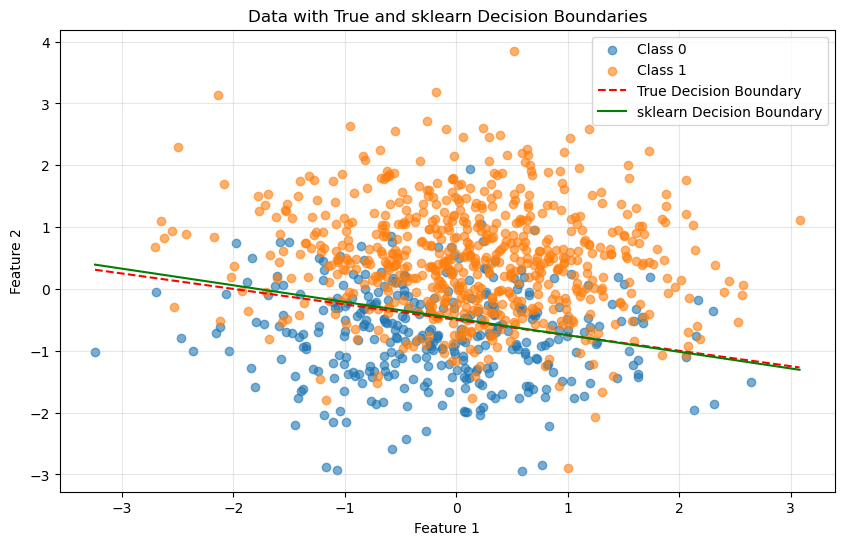

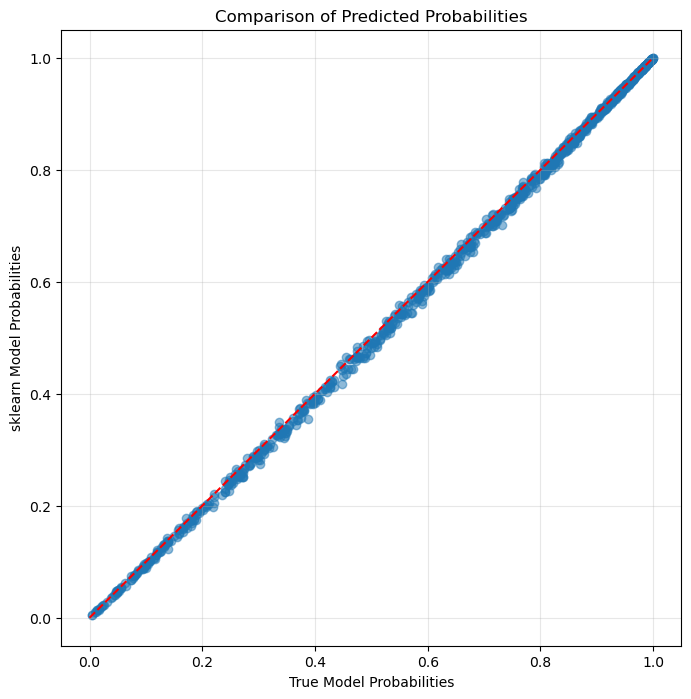

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Use the same random seed as before for consistency
np.random.seed(42)

# Generate data with the specified parameters (same as before)
n = 1000
p = 2
true_beta = np.array([0.5, 2])
true_intercept = 1

# Generate features and outcomes (same as before)
X = generate_X(n, p)
Y = generate_Y(X, true_beta, true_intercept)

# Apply scikit-learn's LogisticRegression
# Setting fit_intercept=True to include the intercept term
# Using 'liblinear' solver for direct comparison with our implementation
# Disabling regularization by setting C to a very large value
sklearn_model = LogisticRegression(fit_intercept=True, C=1e10, solver='liblinear', max_iter=1000)
sklearn_model.fit(X, Y)

# Extract the estimated parameters
sklearn_intercept = sklearn_model.intercept_[0]
sklearn_coefficients = sklearn_model.coef_[0]

# Compare true and sklearn-estimated parameters
print("Parameter Comparison:")
print(f"True parameters: Intercept={true_intercept:.4f}, β₁={true_beta[0]:.4f}, β₂={true_beta[1]:.4f}")
print(f"sklearn estimates: Intercept={sklearn_intercept:.4f}, β₁={sklearn_coefficients[0]:.4f}, β₂={sklearn_coefficients[1]:.4f}")

# Calculate differences between true and sklearn-estimated parameters
diff_intercept = abs(true_intercept - sklearn_intercept)
diff_beta1 = abs(true_beta[0] - sklearn_coefficients[0])
diff_beta2 = abs(true_beta[1] - sklearn_coefficients[1])

print("\nDifferences between true and sklearn-estimated parameters:")
print(f"Intercept difference: {diff_intercept:.6f}")
print(f"β₁ difference: {diff_beta1:.6f}")
print(f"β₂ difference: {diff_beta2:.6f}")

# Visualize the data with true and sklearn decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0', alpha=0.6)
plt.scatter(X[Y==1, 0], X[Y==1, 1], label='Class 1', alpha=0.6)

# Plot the true decision boundary
x1_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
x2_true_boundary = -(true_intercept + true_beta[0] * x1_range) / true_beta[1]
plt.plot(x1_range, x2_true_boundary, 'r--', label='True Decision Boundary')

# Plot the sklearn decision boundary
x2_sklearn_boundary = -(sklearn_intercept + sklearn_coefficients[0] * x1_range) / sklearn_coefficients[1]
plt.plot(x1_range, x2_sklearn_boundary, 'g-', label='sklearn Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data with True and sklearn Decision Boundaries')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Compare predictions between true model and sklearn model
true_probs = 1 / (1 + np.exp(-(true_intercept + np.dot(X, true_beta))))
sklearn_probs = sklearn_model.predict_proba(X)[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(true_probs, sklearn_probs, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True Model Probabilities')
plt.ylabel('sklearn Model Probabilities')
plt.title('Comparison of Predicted Probabilities')
plt.grid(True, alpha=0.3)
plt.show()

Q8: Are the answers the same as that from your implementation? (1 point)